In [1]:
import os
import sys
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from time import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
print("PyTorch Version: ", torch.__version__)

PyTorch Version:  2.1.2+cpu


Dataset\stroberi_busuk_12_16x3_1242023_123855.csv


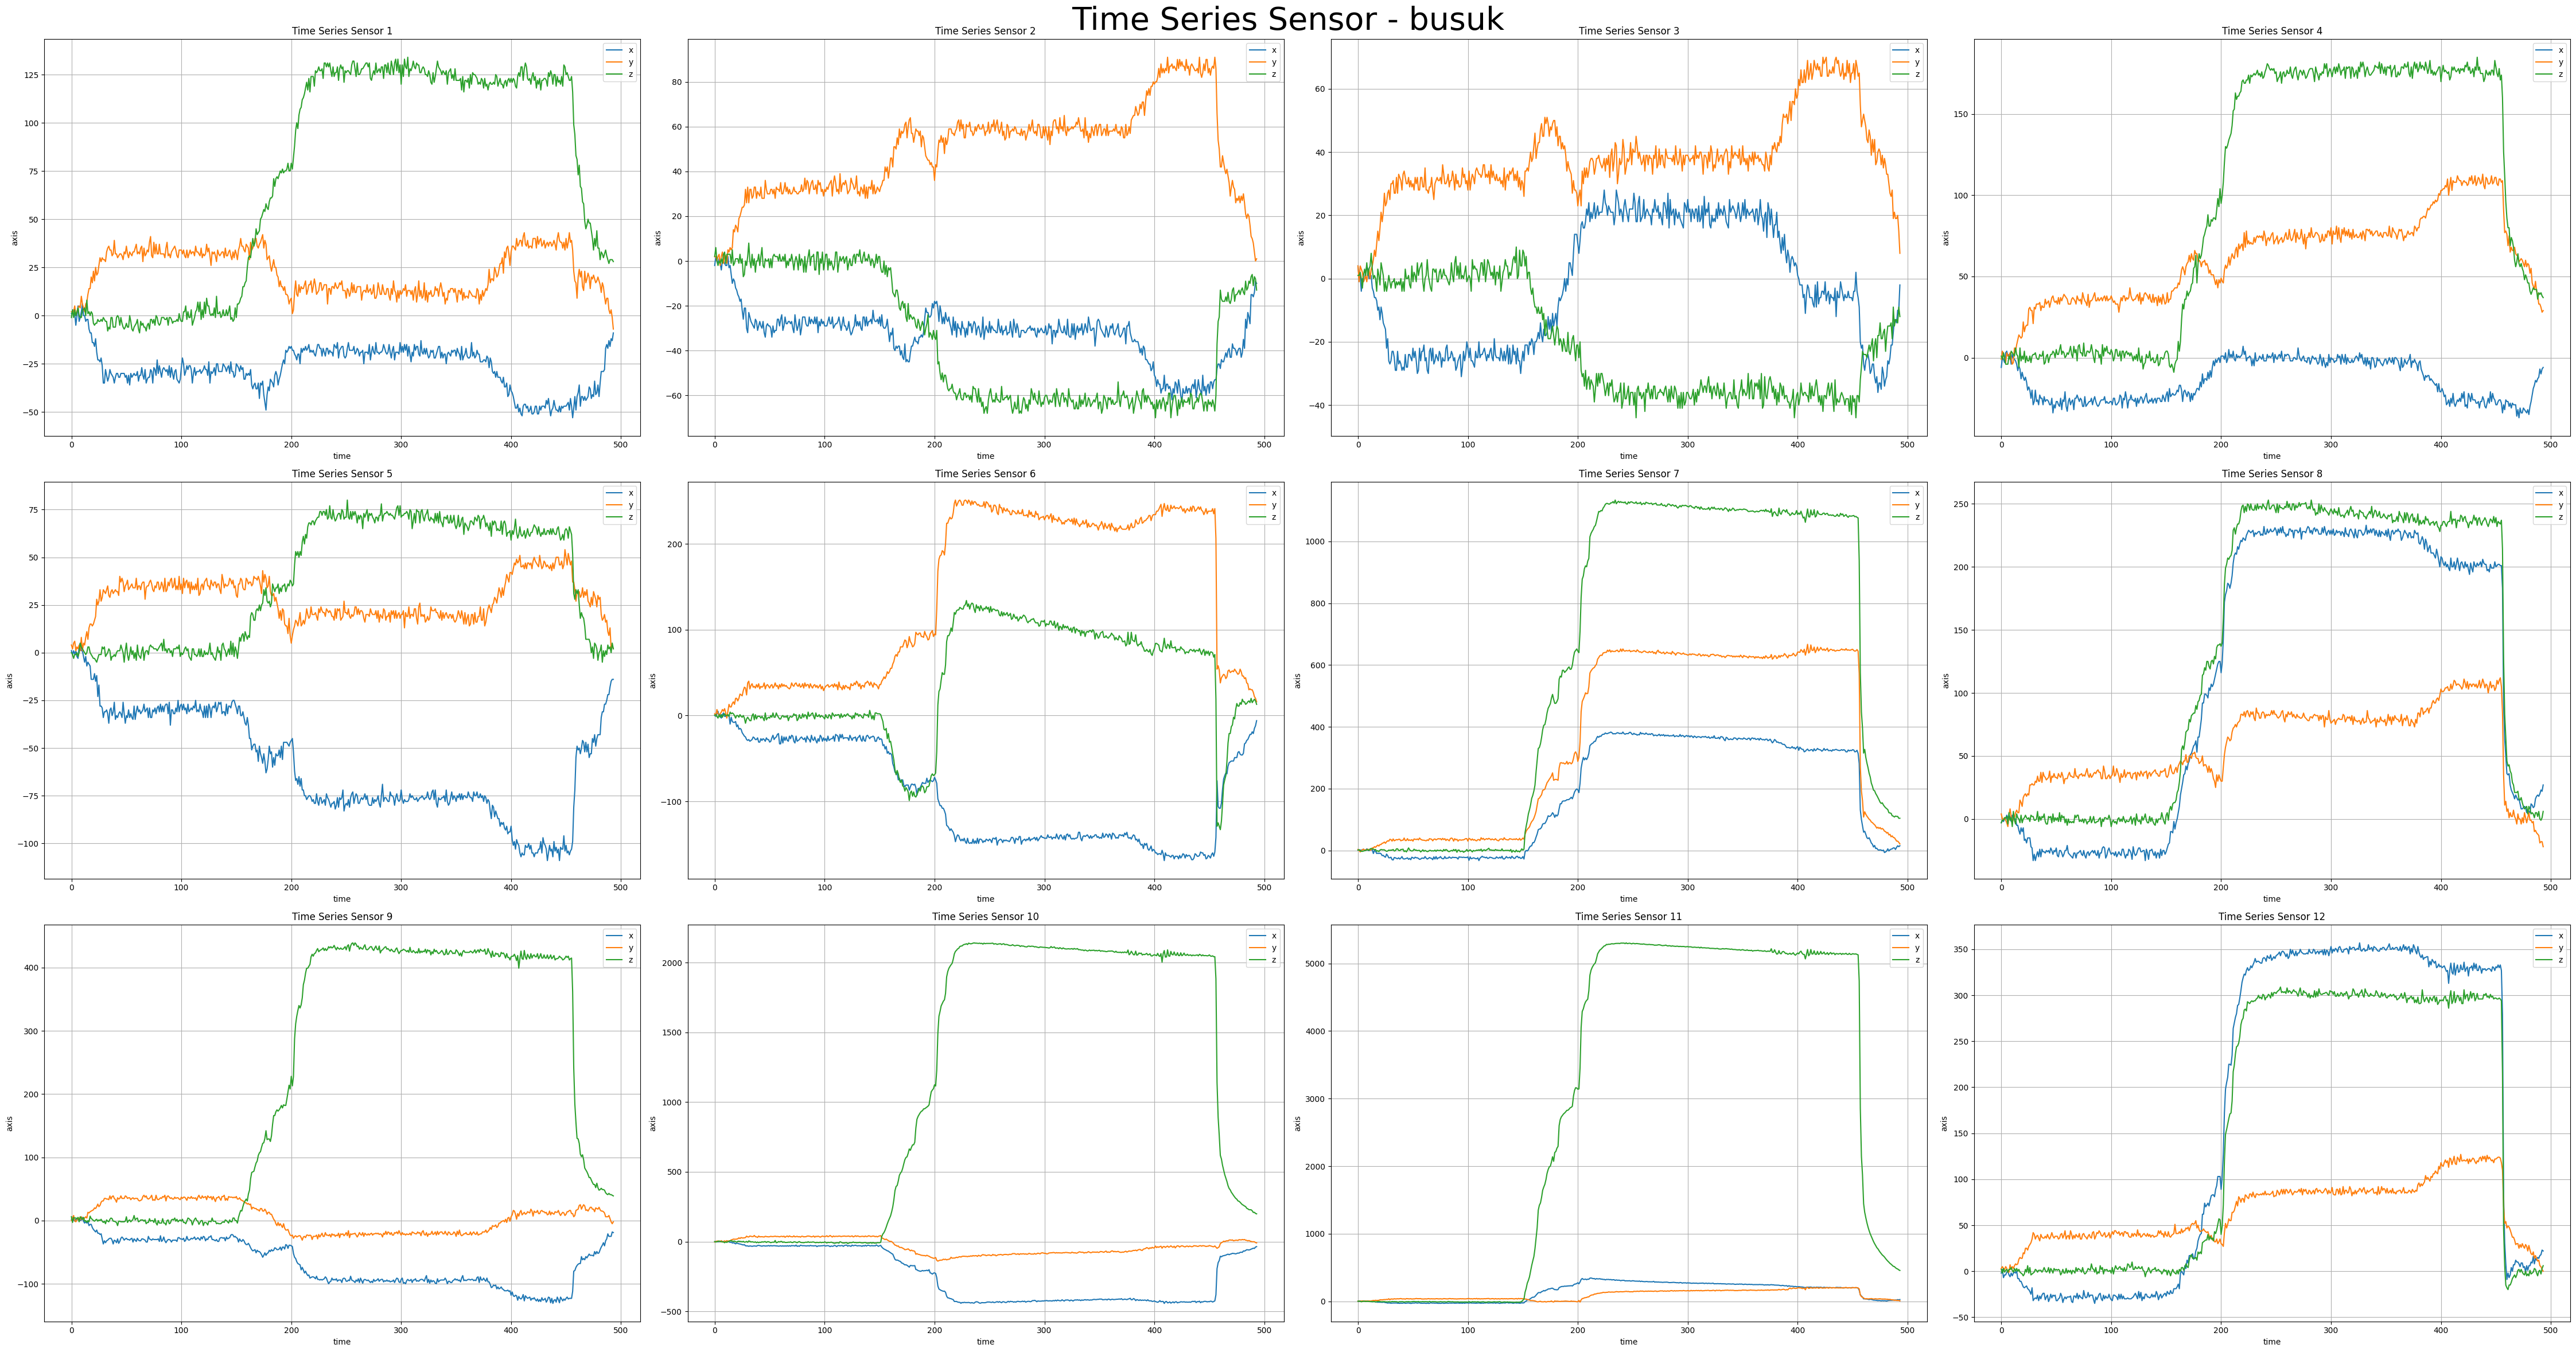

In [3]:
base_path = os.path.join('Dataset')
random_centre = random.choice(os.listdir(base_path))
csv_path = os.path.join(base_path, random_centre)

with open(csv_path, newline='') as f:
    reader = pd.read_csv(f)

    print(csv_path)

fig, ax = plt.subplots(3, 4, figsize=(45, 24))
# Define the columns to plot
columns = [(5, 6, 7), (9, 10, 11), (13, 14, 15), (17, 18, 19), (21, 22, 23), (25, 26, 27), (29, 30, 31), (33, 34, 35), (37, 38, 39), (41, 42, 43), (45, 46, 47), (49, 50, 51)]

# Plot the time series data
for i in range(3):
    for j in range(4):
        column_indices = columns[i * 4 + j]
        ax[i, j].plot(reader.iloc[:, column_indices[0]], label='x')
        ax[i, j].plot(reader.iloc[:, column_indices[1]], label='y')
        ax[i, j].plot(reader.iloc[:, column_indices[2]], label='z')
        ax[i, j].grid(True)
    # Labelling
        ax[i, j].set_xlabel("time")
        ax[i, j].set_ylabel("axis")
        ax[i, j].set_title("Time Series Sensor "+ str(i * 4 + j + 1))
        ax[i, j].legend()

# Extract the title from the path
title = csv_path.split('stroberi_')[1].split('_')[0]

# Set the title for the figure
fig.suptitle("Time Series Sensor - " + title, fontsize=40)

plt.tight_layout()
plt.show()

Preprocessing Data

In [4]:
#sensor all/tengah
#CNN/ANN
#tambah torsi + fruit length

In [5]:
files = glob.glob("./dataset/*")
print("Total number of files: ", len(files))

Total number of files:  360


In [6]:
data = []

for file in files:
    df = pd.read_csv(file,header=None)#.drop([1,2,4,8,12,16,20,24,28,32,36,40,44,48,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67], axis=1)
    df = df[[0,3,25,26,27,29,30,31,41,42,43,45,46,47]].copy() #sensor tengah
    if file[19] == 'b': 
        df[68] = 'busuk'
    elif file[19] == 'l':
        df[68] = 'layu'
    elif file[19] == 's':
        df[68] = 'segar'
    df = df.groupby([68]).agg(tuple).map(np.array).reset_index()
    df.fillna(0, inplace=True)
    data.append(df)

df_s = np.concatenate(data)
df_s = pd.DataFrame(df_s)

In [7]:
df_s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,busuk,"[45.41, 45.41, 45.41, 45.41, 45.41, 45.41, 45....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2, -2, 0, 8, 3, 0, 3, -1, -2, -2, 2, 2, -1, ...","[2, 0, 4, -5, -1, 1, -3, 3, 4, 4, 2, 0, -2, 2,...","[0, -4, 2, -3, 1, 1, 3, -3, -2, 1, 1, 2, 0, 0,...","[3, -2, 1, -5, -2, -2, -2, -1, -4, -1, -3, 2, ...","[-1, 5, 1, 2, 1, 2, -1, -1, 5, 2, 2, 1, -2, 4,...","[2, 2, 0, -5, 0, 0, 2, 3, -2, 1, 0, 2, 3, 2, -...","[1, 1, -2, 1, -2, 1, 2, -1, -3, -2, 0, 3, -1, ...","[5, 4, 0, 5, 3, 3, 6, 3, 4, 2, 5, 3, 4, 4, 7, ...","[-5, 4, -1, 4, 0, -1, -3, 4, 0, -2, -2, 1, 1, ...","[3, -3, 6, 1, 0, -3, -2, -4, 2, -5, 2, 1, -2, ...","[1, -1, 0, 2, 4, -1, 1, 0, 4, 1, 2, 0, 2, 5, 2...","[1, -3, -5, -4, 0, 1, -4, -2, -3, -5, -7, -3, ..."
1,busuk,"[45.41, 45.41, 45.41, 45.41, 45.25, 45.41, 45....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5, -4, -1, 2, 2, 0, -2, 2, 6, 2, 4, 2, 5, -2,...","[6, 1, 3, 10, -1, 3, 2, 1, 1, 3, 3, -3, -1, 2,...","[1, -1, -5, 4, 0, 4, 4, -1, -1, 2, 1, -5, 3, 3...","[-3, 3, -4, -8, 2, 4, 1, 4, -3, -2, -1, 0, 3, ...","[2, -1, 2, 4, -1, 2, 1, 3, 3, 3, 4, 0, 6, 3, 3...","[2, 5, -1, 3, -2, -5, 3, -3, 1, 0, 2, -3, -3, ...","[-1, 1, -5, 0, 0, -2, 1, 3, 3, -2, -4, 4, 0, 0...","[-1, 4, 2, 3, 4, 1, 7, 4, 6, 4, 3, -2, 3, 3, 7...","[5, 6, 3, 5, 3, 6, -1, 9, 1, 5, -3, -2, 0, 2, ...","[1, -2, 3, -1, -1, 0, 5, 2, 1, 2, 1, 0, -2, 1,...","[4, 2, 4, 0, 4, 0, 2, 0, 1, -1, 0, 6, 2, 5, 7,...","[-1, 0, -1, 4, -2, -3, 0, 2, 2, -2, -5, 0, 2, ..."
2,busuk,"[45.41, 45.41, 45.41, 45.41, 45.41, 45.41, 45....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2, -1, -2, -1, -3, 1, 5, 0, -5, 3, 0, 2, -2, ...","[3, -1, 4, 4, 7, 5, 4, 6, 4, 2, 5, 4, 4, 9, 8,...","[-1, -2, 3, 0, 3, 1, 1, 3, 0, -1, 5, 3, 1, -2,...","[2, 1, -1, 0, 5, 1, 14, 2, 6, 4, 2, 4, 8, 2, -...","[-2, 3, 4, 4, 3, 2, 6, 6, 4, 3, 2, 7, 1, 3, 8,...","[2, 7, 2, 3, 3, -2, -3, 0, -2, -3, -3, -4, -1,...","[-1, 3, 1, 2, 1, 3, 2, 3, -1, 3, -1, 0, -1, 0,...","[7, 1, 3, 4, -2, 5, 4, 3, 1, -1, 4, 6, 1, 7, 7...","[-3, -2, 6, 3, 1, 1, -1, -2, -3, -2, -4, 0, -3...","[0, 0, -1, -5, 0, 3, -1, 1, -3, -1, -2, 0, 1, ...","[2, 2, -3, -1, 3, 5, -2, 3, 5, 4, 6, 4, 1, 8, ...","[-5, -7, 0, -3, -5, -4, -10, -11, -9, -9, -8, ..."
3,busuk,"[45.41, 45.41, 45.41, 45.41, 45.25, 45.25, 45....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, -3, 1, -7, 0, 2, 3, 2, -4, 1, 0, 2, 0, -2,...","[2, 1, 2, -2, -2, 1, 3, 2, 1, 2, 10, 5, 1, 0, ...","[1, 4, 0, 5, -2, 2, 1, 6, 0, 1, 0, -1, 2, -1, ...","[1, -2, 6, 3, 3, -1, -2, 0, 3, 2, 1, 5, 0, 0, ...","[6, -1, 1, 4, 2, 3, 3, 5, 5, -3, 2, 1, 6, 6, 9...","[0, 0, 5, 0, 0, 0, -1, -1, -1, -3, 0, 1, -2, 1...","[5, 0, -1, 2, -1, 6, 0, 4, 1, 1, 1, -1, -1, 1,...","[3, 1, 4, 2, 1, 0, 1, -2, 9, 3, 5, 0, 4, 1, 6,...","[1, 0, 4, -3, 2, -1, -1, 1, 1, -2, -2, -1, 3, ...","[2, -3, 3, -3, -4, -3, 1, -3, -1, 4, 1, 2, 4, ...","[2, -2, 1, 2, 1, -1, 0, 1, 5, 0, 3, 6, 3, 3, 9...","[0, 0, -3, 0, 2, -3, -4, -4, -2, -1, -3, -4, -..."
4,busuk,"[45.41, 45.25, 45.25, 45.25, 45.25, 45.25, 45....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, -1, -1, -2, 2, 3, -1, 1, 0, -3, -3, 3, ...","[6, 3, 9, 2, 6, 3, 4, 2, -1, -2, 2, 3, 3, 4, 1...","[-6, -2, 2, 2, -5, 1, 0, 1, 2, -1, 4, 3, -4, 1...","[-1, 1, 2, 3, 3, 5, 1, 9, 4, 0, 2, -1, 1, 0, 4...","[4, 5, 2, 1, 0, 1, 2, 7, 2, 3, 8, 6, 1, 4, 7, ...","[-4, -8, -6, -8, -5, -2, -6, -8, -2, -6, -5, -...","[-1, 2, -3, 3, -1, -2, 2, 1, -2, -2, 0, -3, 4,...","[-4, -6, 4, -4, 2, -1, 1, 4, 5, 1, 1, 4, -1, 6...","[-2, 4, -5, -2, 1, -1, 2, -1, 0, 0, -3, -4, -2...","[1, 3, -3, 4, -1, -4, -3, 2, 0, 2, 2, -1, 6, -...","[4, 6, 5, 3, 2, 6, 3, 3, 6, 7, 5, 0, 5, 9, 9, ...","[-3, -5, -5, -4, -10, 1, -8, -6, -7, -12, -10,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,segar,"[45.57, 45.41, 45.41, 45.41, 45.41, 45.41, 45....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1, -3, -3, -1, 7, 0, 4, 3, -3, 0, -1, 0, -...","[4, 2, 1, 1, 1, 3, 2, 1, 1, 0, 0, 2, 0, 4, 6, ...","[

In [8]:
import statistics as stat
length = []
for i in range(df_s.shape[0]):
    l = len(df_s[2][i])
    length.append(l)
print((length))
print(max(length))
print(min(length))
print(stat.mean(length))
print(stat.median(length))
print(stat.mode(length))

[482, 500, 509, 496, 490, 500, 498, 478, 492, 497, 503, 478, 484, 508, 500, 483, 496, 491, 499, 480, 495, 483, 484, 502, 509, 496, 504, 508, 498, 507, 525, 501, 489, 489, 506, 484, 496, 514, 519, 502, 458, 494, 476, 540, 464, 532, 507, 490, 483, 498, 498, 485, 493, 478, 480, 496, 496, 491, 515, 480, 461, 470, 469, 472, 471, 466, 457, 464, 485, 477, 465, 465, 455, 459, 456, 485, 490, 481, 489, 501, 485, 483, 477, 470, 474, 485, 481, 486, 506, 483, 463, 483, 465, 454, 468, 468, 476, 458, 462, 467, 481, 480, 471, 484, 486, 500, 509, 491, 478, 503, 486, 459, 495, 492, 490, 497, 492, 504, 512, 511, 517, 499, 492, 520, 510, 494, 496, 498, 517, 516, 476, 499, 497, 496, 503, 498, 497, 474, 509, 501, 497, 511, 479, 478, 492, 495, 507, 488, 478, 475, 490, 509, 488, 508, 481, 508, 511, 488, 484, 469, 471, 480, 483, 478, 475, 480, 478, 460, 466, 470, 493, 510, 513, 521, 512, 500, 522, 507, 489, 493, 502, 488, 483, 528, 486, 497, 495, 513, 499, 504, 512, 493, 491, 480, 482, 521, 514, 520, 520, 515,

In [9]:
for m in range(df_s.shape[0]):
    for n in range(1,df_s.shape[1]):
        if len(df_s[n][m])<559:
            data0 = np.zeros((559-len(df_s[n][m]),), dtype=int)
            data0 = np.array(data0)
            df_s[n][m] = np.concatenate((df_s[n][m],data0))

In [10]:
df_s[0] = df_s[0].astype('category')
df_s[0] = df_s[0].cat.codes

In [11]:
#feature-label

X = df_s.drop(columns=0, axis=1)
y = df_s[0].values.reshape(-1,1)
Xnew = np.array(X.values.tolist())
Xnew = Xnew.reshape(Xnew.shape[0], -1)
Xnew[0]

array([45.41, 45.41, 45.41, ...,  0.  ,  0.  ,  0.  ])

In [12]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import MinMaxScaler

#START CODE
scaler = MinMaxScaler()
Xnew = scaler.fit_transform(Xnew)

In [13]:
Xnew = Xnew.reshape(360,14,559) #360 jumlah datanya, 14 jumlah fiturnya, 559 panjang fiturnya
Xnew[0].shape

(14, 559)

In [14]:
Xnew[0]

array([[0.66666667, 0.66666667, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47619048, 0.3125    , 0.57894737, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96153846, 0.93449782, 0.97888676, ..., 0.        , 0.        ,
        0.        ],
       [0.375     , 0.23529412, 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [0.875     , 0.83673469, 0.7962963 , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(handle_unknown='ignore')
y = OHE.fit_transform(y).toarray()

In [16]:
X = torch.tensor(Xnew, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [17]:
#train-test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [18]:
# Membuat dataset dan loader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size_train = 32
batch_size_test = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size_test, shuffle=False)

Build Model

In [19]:
# input_size = 14*559
hidden_sizes = [120,30]  # Define the hidden layer sizes
output_size = 3

class ConvolutionFC(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(ConvolutionFC, self).__init__()
        
        self.conv = nn.Sequential(
            nn.Conv1d(input_size[0], 32, kernel_size=3, padding=1),
            nn.MaxPool1d(2),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool1d(2),
            nn.ReLU(),
            nn.Dropout(),
            nn.Flatten()
        )
        
        
        self.fc = nn.Sequential(
            nn.Linear(64*139, hidden_sizes[0]),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_sizes[1], output_size),
            nn.Softmax(dim=1)
        )
        

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x
model = ConvolutionFC((14,559), hidden_sizes, output_size)

In [20]:
from torchsummary import summary
summary(model, input_size=(14,559))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 559]           1,376
         MaxPool1d-2              [-1, 32, 279]               0
              ReLU-3              [-1, 32, 279]               0
            Conv1d-4              [-1, 64, 279]           6,208
         MaxPool1d-5              [-1, 64, 139]               0
              ReLU-6              [-1, 64, 139]               0
           Dropout-7              [-1, 64, 139]               0
           Flatten-8                 [-1, 8896]               0
            Linear-9                  [-1, 120]       1,067,640
             ReLU-10                  [-1, 120]               0
          Dropout-11                  [-1, 120]               0
           Linear-12                   [-1, 30]           3,630
             ReLU-13                   [-1, 30]               0
          Dropout-14                   

In [21]:
print(model)

ConvolutionFC(
  (conv): Sequential(
    (0): Conv1d(14, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Dropout(p=0.5, inplace=False)
    (7): Flatten(start_dim=1, end_dim=-1)
  )
  (fc): Sequential(
    (0): Linear(in_features=8896, out_features=120, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=120, out_features=30, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=30, out_features=3, bias=True)
    (7): Softmax(dim=1)
  )
)


In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0005)

In [23]:
inputs, labels = next(iter(train_loader))
logps = model(inputs)
loss = criterion(logps, torch.max(labels, 1)[1])

In [24]:
print("Before backward pass: \n", model.fc[0].weight.grad)
loss.backward()
print("After backward pass: \n", model.fc[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


Train Model

In [25]:
time0=time()
epochs = 50
correct_count, all_count = 0, 0
trainloss, trainacc = [], []

def train():
    model.train()
    running_loss = 0
    for inputs, label in train_loader:
        output = model(inputs)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item() 
        with torch.no_grad():
            _, pred = torch.max(output.data, 1)
    label = np.argmax(label, axis=1)
    acc = accuracy_score(y_true=label, y_pred=pred)
    trainloss.append((running_loss/len(train_loader.dataset)))
    trainacc.append(acc)
    print("Training Loss:\t\tAccuracy:\n",running_loss/len(train_loader.dataset),"\t",acc)
    print("Training Time = ",(time()-time0), "s")    

Test Model

In [26]:
correct_count, all_count = 0, 0
testloss, testacc = [], []

def test():
    model.eval()
    running_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            running_loss += loss.item()
            _, pred = torch.max(output.data, 1)
    target = np.argmax(target, axis=1)
    acc = accuracy_score(y_true=target, y_pred=pred)
    testloss.append((running_loss/len(test_loader.dataset)))
    testacc.append(acc)
    print("Test Loss:\t\tAccuracy:\n", running_loss/len(test_loader.dataset), "\t\t", acc, "\n")

In [27]:
for epoch in range(epochs):
    print('Epoch:', epoch+1)
    train()
    test()

Epoch: 1


Training Loss:		Accuracy:
 0.03478986166772388 	 0.42857142857142855
Training Time =  0.2757744789123535 s
Test Loss:		Accuracy:
 0.020156436496310763 		 0.4318181818181818 

Epoch: 2
Training Loss:		Accuracy:
 0.03435130535610138 	 0.42857142857142855
Training Time =  0.5574214458465576 s
Test Loss:		Accuracy:
 0.01950546105702718 		 0.7045454545454546 

Epoch: 3
Training Loss:		Accuracy:
 0.03308804829915365 	 0.5357142857142857
Training Time =  0.8179974555969238 s
Test Loss:		Accuracy:
 0.018208803402052984 		 0.7045454545454546 

Epoch: 4
Training Loss:		Accuracy:
 0.0313585689143529 	 0.5357142857142857
Training Time =  1.0866353511810303 s
Test Loss:		Accuracy:
 0.017322837202637283 		 0.7045454545454546 

Epoch: 5
Training Loss:		Accuracy:
 0.030478185841015408 	 0.5
Training Time =  1.3823456764221191 s
Test Loss:		Accuracy:
 0.01654710151531078 		 0.7727272727272727 

Epoch: 6
Training Loss:		Accuracy:
 0.029041203241499645 	 0.6071428571428571
Training Time =  1.654816865921

Evaluation

True labels: [1 0 2 2 0 2 0 0 2 1 0 2 1 2 0 1 1 2 1 2 1 1 2 0 2 1 1 2 0 0 2 0 2 1 0 0 0
 2 0 0 1 0 2 0 1 1 0 0 0 2 2 1 1 0 2 2 0 0 0 2 0 0 1 0 0 0 2 1 2 0 1 1 2 2
 1 0 1 2 0 0 1 0 1 1 2 2 1 1 0 2 0 0 2 0 1 1 0 1 0 0 2 1 1 1 1 1 2 2]
pred labels:  [1 2 2 2 0 1 0 0 2 1 0 2 2 2 1 1 1 2 1 2 1 1 2 0 1 0 1 2 1 0 2 0 2 1 1 0 0
 2 0 0 1 0 2 0 1 2 0 0 0 2 2 1 1 0 2 1 0 0 0 2 1 0 2 0 0 0 2 1 2 0 1 1 2 2
 1 0 1 2 0 0 1 0 1 1 2 2 1 1 0 2 2 0 2 0 1 1 0 1 1 0 2 1 1 1 1 1 2 2]


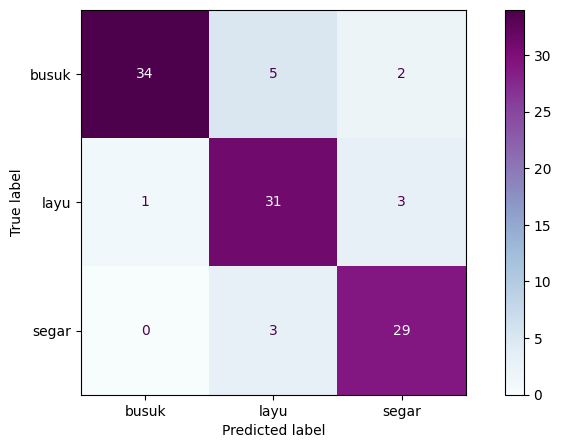

              precision    recall  f1-score   support

           0       0.97      0.83      0.89        41
           1       0.79      0.89      0.84        35
           2       0.85      0.91      0.88        32

    accuracy                           0.87       108
   macro avg       0.87      0.87      0.87       108
weighted avg       0.88      0.87      0.87       108

0.8703703703703703


In [28]:
labels = ['busuk','layu','segar']

# get all the predictions for the entire training set
def get_all_preds(model, test_loader):
    all_preds = torch.tensor([])
    model.eval() # set model to evaluate mode
    
    for images, labels in test_loader:
        with torch.no_grad(): # disable gradient computations
            preds = model(images)
        all_preds = torch.cat((all_preds, preds), dim=0)
    
    return all_preds 

test_preds = get_all_preds(model, test_loader)

print('True labels:', torch.max(y_test, 1)[1].numpy())
print('pred labels: ', test_preds.argmax(dim=1).numpy())

# simply call the confusion_matrix function to build a confusion matrix
conf_matrix = confusion_matrix(torch.max(y_test, 1)[1], test_preds.argmax(dim=1))

f, axes = plt.subplots(1, 1, figsize=(10, 5))
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels).plot(cmap='BuPu', ax=axes)
axes.set_xticklabels(labels)
axes.set_yticklabels(labels)
plt.show()
print(classification_report(y_true=torch.max(y_test, 1)[1], y_pred=test_preds.argmax(dim=1)))
print(accuracy_score(y_true=torch.max(y_test, 1)[1], y_pred=test_preds.argmax(dim=1)))

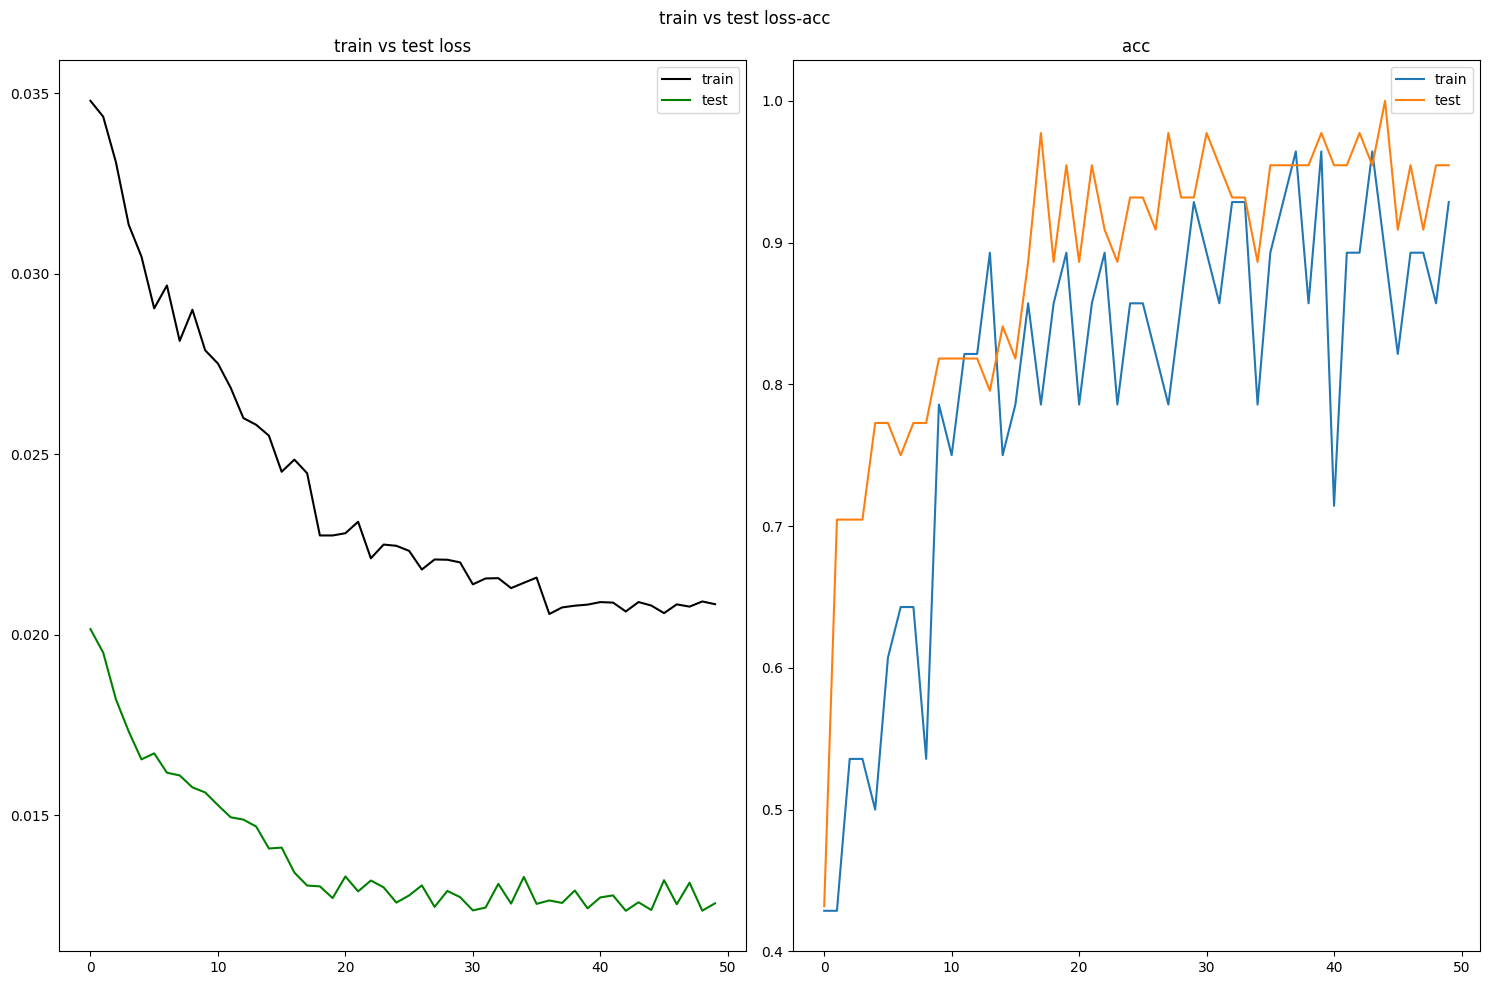

In [29]:
fig = plt.figure(1, figsize=(15, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(trainloss, label='train', color="black")
ax1.plot(testloss, label='test', color="green")
ax1.legend()

ax2.plot(trainacc, label='train')
ax2.plot(testacc, label='test')
ax2.legend()

ax1.title.set_text('train vs test loss')
ax2.title.set_text('acc')

plt.suptitle("train vs test loss-acc")
plt.tight_layout()
plt.show()

In [30]:
print("{:.2f}%".format(testacc[epochs-1]*100))

95.45%


In [31]:
def init_classification_model(model_class, model_path):
    torch.save(model_class.state_dict(), model_path)
    return model_class

In [32]:
model_class=model
model_path="./modelcnn.pt"
torch.save(model_class.state_dict(), model_path)